In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("reviews.csv") #read dataset
df.shape

(349, 9)

In [3]:
df.isnull().sum()

ID                 0
V1                 0
V2                 0
V3                 0
Date               0
V4                 0
review_title       0
review_detail      0
Unnamed: 8       348
dtype: int64

In [4]:
df=df.drop(columns="Unnamed: 8", axis=0) #dropped the last column which is not the part of dataset
df.shape

(349, 8)

In [5]:
df.head(3)

,ID,V1,V2,V3,Date,V4,review_title,review_detail
0,B00FB2XNCE,3,67,81,"October 3, 2013",AA7CHSYLJOSY4,Blu Tooth Issues resolved - Updated,Bought this device as second Android screen fo...
1,B00FB2XNCE,1,1,5,"August 8, 2014",A1WWGDOFTCW8Q,One Star,"Bad qulity its not water proof , now my watch ..."
2,B00FB2XNCE,5,1,1,"August 7, 2014",A2TYLWQL2P5ND6,Excelente producto... recomendado 100%,Excelente producto... recomendado 100%


In [6]:
df['V1'].value_counts()

5    160
4     68
3     51
1     42
2     28
Name: V1, dtype: int64

In [7]:
df=df[df['V1']!=3] # dropping the rows with review 3.Since we are interested in low and high ratings and not the moderate

In [8]:
df.shape

(298, 8)

In [9]:
df['V1'].value_counts()

5    160
4     68
1     42
2     28
Name: V1, dtype: int64

In [10]:
df["Positive rating"]=np.where(df['V1']>3, 1, 0)
df["Positive rating"]

1      0
2      1
3      1
4      1
5      1
      ..
342    0
343    1
344    0
347    1
348    1
Name: Positive rating, Length: 298, dtype: int32

In [11]:
df["Positive rating"].value_counts()

1    228
0     70
Name: Positive rating, dtype: int64

In [12]:
import seaborn as sns

C:\Users\renuka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Positive rating', ylabel='count'>

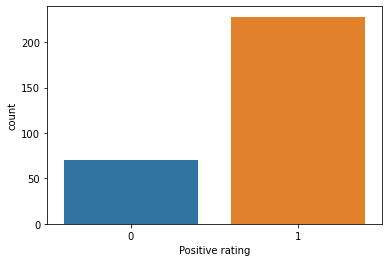

In [13]:
sns.countplot(df["Positive rating"])

In [14]:
import sklearn.feature_extraction.text as text

In [15]:
review=list(df['review_title'])
review

['One Star',
 'Excelente producto... recomendado 100%',
 'I am extremely glad I purchased it',
 'same as the old one, just bigger screen',
 'Five Stars',
 'One Star',
 "The Bluetooth doesn't work instantly. Whenever I got notice ...",
 'Five Stars',
 'Five Stars',
 'Five Stars',
 'Get the galaxy gear instead.',
 'Awesome new toy.',
 'Great for reading notifications and SMS messages!',
 'Not what I expected, but everything it claims to be.',
 'Good for the price',
 'The Sony SW2 is far more than what I had originally expected',
 'APRIL UPDATE allows you to change background wallpaper.',
 'Watch out!',
 'Not quite what it could be',
 'Fail',
 'It did but the screen resolution sucked, and connecting with your smartphone was clunky and ...',
 'Four Stars',
 'Not Galaxy Gear, but that was not what I was going for.',
 'Five Stars',
 "So cool! Got one for my husband for Father's Day ...",
 'Very handy.',
 'Four Stars',
 'Five Stars',
 'Smart Looking Smart Watch',
 'only worked for 11 days',
 

In [16]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", 
             "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 
             'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
             'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 
             'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 
             'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
             'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
             'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 
             'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 
             'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 
             'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 
             'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 
             "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', 
             "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 
             'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 
             'won', "won't", 'wouldn', "wouldn't", "makes", "ii", "ive"]

In [17]:
vectorizer = text.TfidfVectorizer(stop_words=stopwords,max_features = 20000)

In [18]:
tfidf_matrix = vectorizer.fit_transform(review)
vectorizer.get_feature_names_out()

array(['100', '11', '200', '2hrs', '3rd', 'absolute', 'acc', 'accesory',
       'accessory', 'addition', 'additions', 'advertised', 'allows',
       'almost', 'alot', 'alright', 'amazed', 'amazing', 'amazingly',
       'android', 'another', 'apps', 'april', 'assurance', 'attention',
       'avoid', 'away', 'awesome', 'awsome', 'background', 'bad', 'bank',
       'bargain', 'basic', 'battery', 'best', 'better', 'beware', 'big',
       'bigger', 'blackberry', 'blessing', 'bluetooth', 'bought',
       'bricked', 'broke', 'bugs', 'business', 'buy', 'buyer', 'catch',
       'cellphone', 'change', 'charm', 'check', 'choice', 'choices',
       'claims', 'clock', 'clunky', 'come', 'companion', 'compatibility',
       'compatible', 'concept', 'configuration', 'connecting',
       'consistently', 'constantly', 'contender', 'convenient', 'cool',
       'correction', 'could', 'crap', 'crazy', 'customer', 'day', 'days',
       'deal', 'decent', 'decision', 'defective', 'definitely',
       'describ

In [19]:
tfidf_matrix.shape

(298, 369)

In [20]:
tfidf_matrix

<298x369 sparse matrix of type '<class 'numpy.float64'>'
	with 843 stored elements in Compressed Sparse Row format>

In [21]:
tfidf_matrix.todense()

matrix([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0.5, 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [22]:
vectorizer.get_feature_names()

C:\Users\renuka\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['100',
 '11',
 '200',
 '2hrs',
 '3rd',
 'absolute',
 'acc',
 'accesory',
 'accessory',
 'addition',
 'additions',
 'advertised',
 'allows',
 'almost',
 'alot',
 'alright',
 'amazed',
 'amazing',
 'amazingly',
 'android',
 'another',
 'apps',
 'april',
 'assurance',
 'attention',
 'avoid',
 'away',
 'awesome',
 'awsome',
 'background',
 'bad',
 'bank',
 'bargain',
 'basic',
 'battery',
 'best',
 'better',
 'beware',
 'big',
 'bigger',
 'blackberry',
 'blessing',
 'bluetooth',
 'bought',
 'bricked',
 'broke',
 'bugs',
 'business',
 'buy',
 'buyer',
 'catch',
 'cellphone',
 'change',
 'charm',
 'check',
 'choice',
 'choices',
 'claims',
 'clock',
 'clunky',
 'come',
 'companion',
 'compatibility',
 'compatible',
 'concept',
 'configuration',
 'connecting',
 'consistently',
 'constantly',
 'contender',
 'convenient',
 'cool',
 'correction',
 'could',
 'crap',
 'crazy',
 'customer',
 'day',
 'days',
 'deal',
 'decent',
 'decision',
 'defective',
 'definitely',
 'describe',
 'device',
 'dev

In [23]:
pd.DataFrame(tfidf_matrix.todense(),columns=vectorizer.get_feature_names())

,100,11,200,2hrs,3rd,absolute,acc,accesory,accessory,addition,...,worst,worth,would,wow,wrist,wristwear,xperia,yet,z1,z2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
tfidf_matrix.shape

(298, 369)

In [25]:
tfidf_matrix

<298x369 sparse matrix of type '<class 'numpy.float64'>'
	with 843 stored elements in Compressed Sparse Row format>

In [26]:
y = df["V1"].values
y

array([1, 5, 5, 4, 5, 1, 2, 5, 5, 5, 1, 5, 4, 5, 5, 5, 5, 4, 4, 1, 1, 4,
       5, 5, 5, 5, 4, 5, 4, 1, 5, 2, 5, 1, 1, 4, 4, 5, 5, 5, 5, 5, 1, 5,
       5, 5, 5, 4, 5, 4, 4, 5, 1, 5, 5, 5, 5, 4, 5, 4, 2, 5, 4, 4, 5, 5,
       4, 2, 5, 5, 2, 1, 5, 1, 4, 5, 5, 5, 5, 5, 5, 4, 1, 2, 4, 2, 1, 5,
       2, 5, 1, 4, 5, 5, 5, 4, 5, 4, 5, 5, 5, 1, 5, 5, 5, 5, 1, 4, 5, 5,
       5, 5, 5, 4, 5, 4, 2, 5, 4, 5, 5, 4, 5, 4, 4, 4, 5, 5, 5, 1, 4, 4,
       5, 5, 5, 2, 4, 4, 4, 5, 1, 5, 1, 5, 5, 5, 2, 1, 5, 2, 4, 4, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 1, 1, 5, 4, 5, 5, 1, 2,
       5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 2, 5, 1, 5, 5,
       4, 1, 4, 4, 5, 5, 2, 5, 5, 4, 5, 5, 4, 2, 2, 4, 4, 1, 2, 5, 4, 4,
       4, 4, 4, 1, 5, 2, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 4, 5, 5, 2,
       5, 5, 2, 5, 1, 2, 5, 1, 1, 4, 5, 5, 4, 5, 4, 2, 5, 5, 4, 5, 5, 5,
       4, 2, 5, 5, 5, 1, 1, 1, 4, 4, 1, 4, 1, 2, 5, 5, 5, 5, 4, 4, 2, 5,
       5, 5, 4, 1, 5, 5, 2, 1, 5, 2, 5, 4], dtype=i

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tfidf_matrix,y,test_size=0.20,random_state=42)

In [28]:
X_train.shape

(238, 369)

In [29]:
X_test.shape

(60, 369)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()
model=model.fit(X_train, y_train)

In [32]:
pred = model.predict_proba(X_test)
pred.shape

(60, 4)

In [33]:
y_test.shape

(60,)

In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
print("AUC is", roc_auc_score(y_test,pred, multi_class="ovr"))

AUC is 0.8401348028900113


In [36]:
feature_names=np.array(vectorizer.get_feature_names_out())
sorted_coef_index=model.coef_[0].argsort()

In [37]:
print("Largest coef", feature_names[sorted_coef_index[:10]])

Largest coef ['good' 'stars' 'smartwatch' 'love' 'smart' 'great' 'five' 'awesome'
 'four' 'ready']


In [38]:
print("Smallest coef", feature_names[sorted_coef_index[-10:]])

Smallest coef ['customer' 'quality' 'horrible' 'beware' 'sad' 'fail' 'suck' 'sync' 'one'
 'star']
